In [1]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
qc = QuantumCircuit(3,3)

In [3]:
initial_state = [0,1]
qc.initialize(initial_state, 0)

In [4]:
qc.h(1)
qc.cx(1,2)
print(qc)

     ┌─────────────────┐     
q_0: ┤ Initialize(0,1) ├─────
     └──────┬───┬──────┘     
q_1: ───────┤ H ├─────────■──
            └───┘       ┌─┴─┐
q_2: ───────────────────┤ X ├
                        └───┘
c: 3/════════════════════════
                             


In [5]:
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1], [0,1])
print(qc)

     ┌─────────────────┐          ┌───┐ ░ ┌─┐   
q_0: ┤ Initialize(0,1) ├───────■──┤ H ├─░─┤M├───
     └──────┬───┬──────┘     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ───────┤ H ├─────────■──┤ X ├──────░──╫─┤M├
            └───┘       ┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ───────────────────┤ X ├───────────░──╫──╫─
                        └───┘           ░  ║  ║ 
c: 3/══════════════════════════════════════╩══╩═
                                           0  1 


In [12]:
qc.x(2).c_if(0,1)
qc.z(2).c_if(1,1)

In [13]:
qc.measure(2,2)

In [16]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

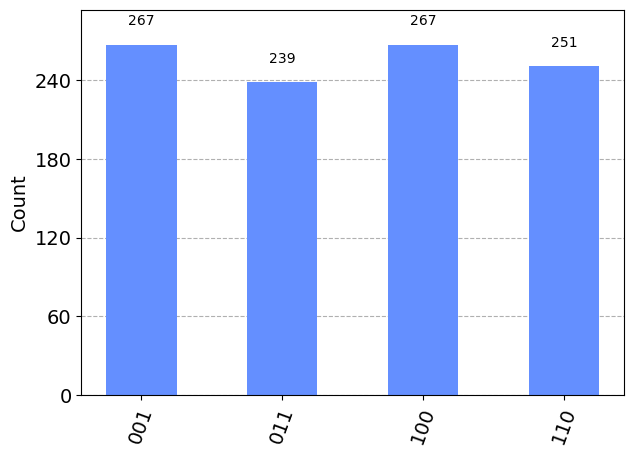

In [17]:
plot_histogram(counts)

In [20]:
qc.draw()

┌─────────────────┐          ┌───┐ ░ ┌─┐                               
q_0: ┤ Initialize(0,1) ├───────■──┤ H ├─░─┤M├───────────────────────────────
     └──────┬───┬──────┘     ┌─┴─┐└───┘ ░ └╥┘┌─┐                            
q_1: ───────┤ H ├─────────■──┤ X ├──────░──╫─┤M├────────────────────────────
            └───┘       ┌─┴─┐└───┘      ░  ║ └╥┘   ┌───┐      ┌───┐   ┌─┐┌─┐
q_2: ───────────────────┤ X ├───────────░──╫──╫────┤ Z ├──────┤ X ├───┤M├┤M├
                        └───┘           ░  ║  ║    └─╥─┘      └─╥─┘   └╥┘└╥┘
                                           ║  ║ ┌────╨────┐┌────╨────┐ ║  ║ 
c: 3/══════════════════════════════════════╩══╩═╡ c_0=0x1 ╞╡ c_1=0x1 ╞═╩══╩═
                                           0  1 └─────────┘└─────────┘ 2  2